# Exercise Sheet 5 : Independent Component Analysis
Machine Intelligence 2
SS 2017, Obermayer/Augustin/Guo
Group: Outlaws (Muhammed Cengizhan Özmen, Zhanwang Chen, Sedat Koca, Huajun Li, Khaled Mansour)

In [1]:
import numpy as np
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from numpy import *

from scipy import signal
from scipy.io import wavfile
from scipy import linalg as LA
from numpy.random import randn as RNDN

In [2]:
#(a) Load the sound files.
sound1 = pd.read_csv("sound1.dat",header=None).values
sound2 = pd.read_csv("sound2.dat",header=None).values
#print sound1
#print sound2.shape
#print sound2.shape[0]*2


#(b) Create a random (& invertible) N ×N mixing matrix A and mix the sources:
A = numpy.random.uniform(low=0.1, high=1.0, size=[2,2])
S = np.concatenate((sound1,sound2),axis=1)
X= A.dot(S.T)


In [3]:

cov = np.cov(X)

d, E = LA.eigh(cov)
D = np.diag(d)

Di = LA.sqrtm(LA.inv(D))

xn = np.dot(Di, np.dot(np.transpose(E), X))

In [4]:
samplingRate = 8192
wavfile.write('sound1.wav', samplingRate, sound1)
wavfile.write('sound2.wav', samplingRate, sound2)

In [5]:
def g(x):
    out = np.tanh(x)
    return out


def dg(x):
    out = 1 - g(x) * g(x)
    return out

In [6]:
#xn= X
#x=X
xn=xn 
x=X

dim = 2

# Initialize the unmixing matrix W with random values.
w1 = RNDN(dim, 1)
w1 = w1 / LA.norm(w1)

w0 = RNDN(dim, 1)
w0 = w0 / LA.norm(w0)
n = X.shape[1]

epsilon = 0.01 
alpha = 0.1  

while (abs(abs(np.dot(np.transpose(w0), w1)) - 1) > epsilon):
    w0 = w1
    w1 = np.dot(xn, np.transpose(g(np.dot(np.transpose(w1), xn)))) / \
        n - alpha * \
        np.transpose(np.mean(np.dot(dg(np.transpose(w1)), xn), axis=1)) * w1
    w1 = w1 / LA.norm(w1)

w2 = RNDN(dim, 1)
w2 = w2 / LA.norm(w2)

w0 = RNDN(dim, 1)
w0 = w0 / LA.norm(w0)

while (abs(abs(np.dot(np.transpose(w0), w2)) - 1) > 0.01):
    w0 = w2
    w2 = np.dot(xn, np.transpose(g(np.dot(np.transpose(w2), xn)))) / \
        n - alpha * \
        np.transpose(np.mean(np.dot(dg(np.transpose(w2)), xn), axis=1)) * w2
    w2 = w2 - np.dot(np.transpose(w2), w1) * w1
    w2 = w2 / LA.norm(w2)


w = np.transpose([np.transpose(w1), np.transpose(w2)])
s = np.dot(w, x)

In [24]:
wavfile.write('recovered1.wav', samplingRate, np.transpose(s[0][0]))
wavfile.write('recovered2.wav', samplingRate, np.transpose(s[1][0]))

wavfile.write('mixed1.wav', samplingRate, X[0])
wavfile.write('mixed2.wav', samplingRate, X[1])
print s.shape
print xn.shape

(2, 1, 18000)
(2, 18000)


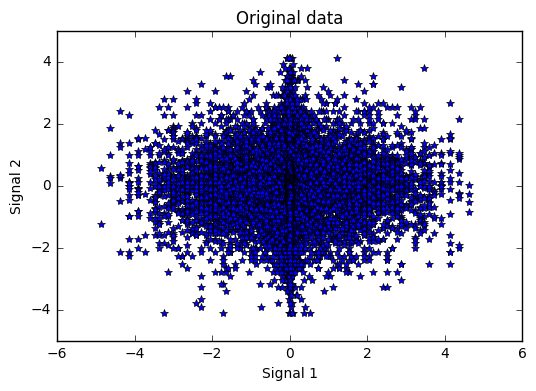

In [8]:
plt.figure()
plt.plot(sound1, sound2, '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

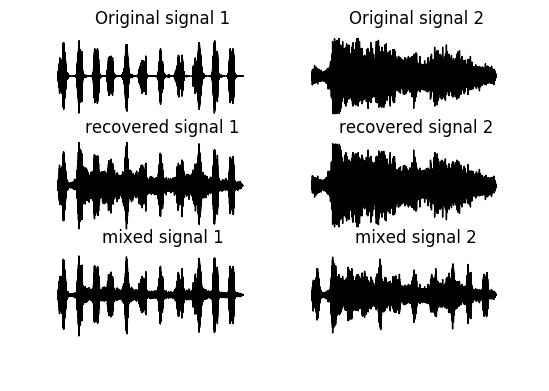

In [25]:
# Plot
#print n
time = np.arange(0, n, 1)
time = 1.0 * time / samplingRate
time = time * 1000  # convert to milliseconds
samplingRate, orig1 = wavfile.read('sound1.wav')
samplingRate, orig2 = wavfile.read('sound2.wav')

plt.figure()

plt.subplot(3,2, 1).set_axis_off()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")




#print samplingRate
#print orig2.shape
#print time
#print time.shape

plt.subplot(3, 2, 2).set_axis_off()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")


plt.subplot(3, 2, 3).set_axis_off()
plt.plot(time, s[1][0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("recovered signal 1")

plt.subplot(3, 2, 4).set_axis_off()
plt.plot(time, s[0][0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("recovered signal 2")

plt.subplot(3, 2, 5).set_axis_off()
plt.plot(time, X[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("mixed signal 1")

plt.subplot(3, 2, 6).set_axis_off()
plt.plot(time, X[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("mixed signal 2")


